In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn.preprocessing as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wrangle as w
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
train, validate, test = w.wrangle_zillow()

In [3]:
train.shape, validate.shape, test.shape

((1170752, 8), (501752, 8), (418126, 8))

In [4]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,propertylandusetypeid
1300070,4.0,2.0,1295.0,356809.0,1954.0,4260.46,6059.0,261.0
1452400,3.0,2.0,1560.0,388535.0,1968.0,3935.70,6059.0,261.0
1765137,5.0,2.5,2488.0,370328.0,2000.0,4345.96,6111.0,261.0
1668212,4.0,2.5,2390.0,473000.0,2003.0,5715.74,6111.0,261.0
1670142,2.0,1.0,1062.0,447299.0,1938.0,4906.42,6037.0,261.0


1) Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [5]:
#make copies of train
train_1 = train.copy()
train_2 = train.copy()
train_3 = train.copy()

In [6]:
scale_cols = ['bedrooms', 'bathrooms', 'area', 'year_built', 'taxamount']

MinMax Scaler

In [7]:
minmax_scaler = p.MinMaxScaler()

In [8]:
minmax_scaler.fit(train_1[scale_cols])


MinMaxScaler()

In [9]:
train_1[scale_cols] = minmax_scaler.transform(train_1[scale_cols])

In [10]:
train_1.head(), train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170752 entries, 1300070 to 1635134
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   bedrooms               1170752 non-null  float64
 1   bathrooms              1170752 non-null  float64
 2   area                   1170752 non-null  float64
 3   tax_value              1170752 non-null  float64
 4   year_built             1170752 non-null  float64
 5   taxamount              1170752 non-null  float64
 6   fips                   1170752 non-null  float64
 7   propertylandusetypeid  1170752 non-null  float64
dtypes: float64(8)
memory usage: 80.4 MB


(         bedrooms  bathrooms      area  tax_value  year_built  taxamount  \
 1300070     0.500     0.2500  0.129698   356809.0    0.711628   0.046866   
 1452400     0.375     0.2500  0.156259   388535.0    0.776744   0.043288   
 1765137     0.625     0.3125  0.249273   370328.0    0.925581   0.047808   
 1668212     0.500     0.3125  0.239451   473000.0    0.939535   0.062898   
 1670142     0.250     0.1250  0.106345   447299.0    0.637209   0.053982   
 
            fips  propertylandusetypeid  
 1300070  6059.0                  261.0  
 1452400  6059.0                  261.0  
 1765137  6111.0                  261.0  
 1668212  6111.0                  261.0  
 1670142  6037.0                  261.0  ,
 None)

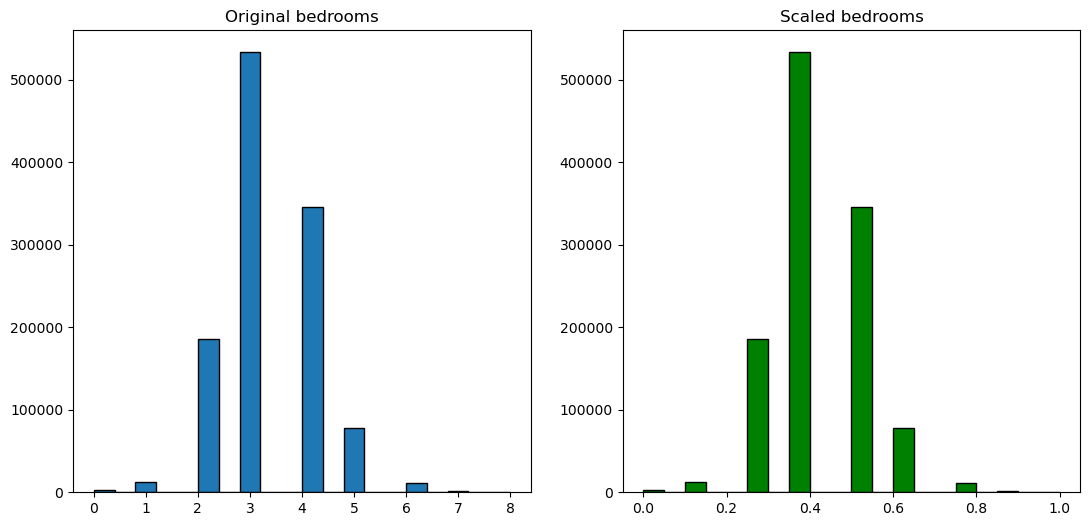

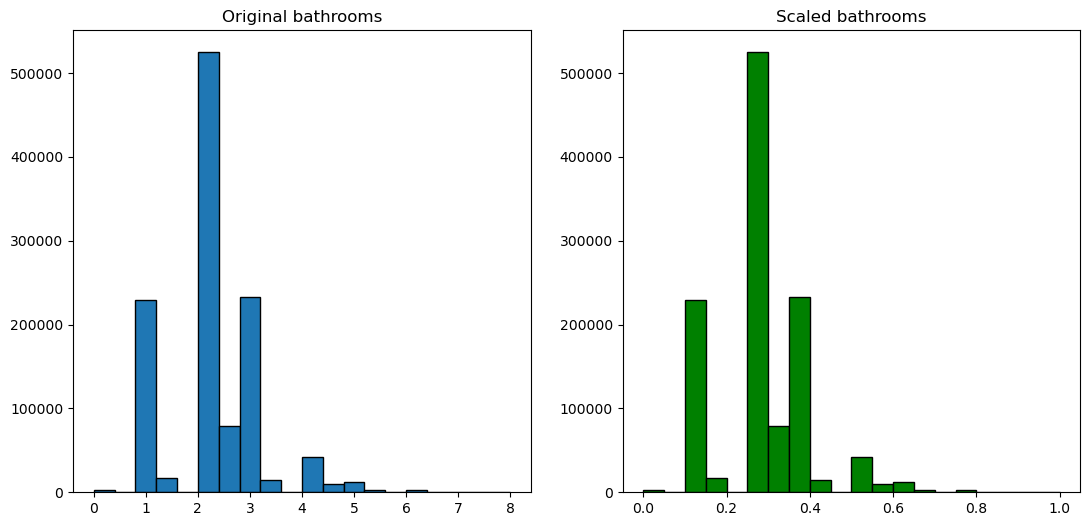

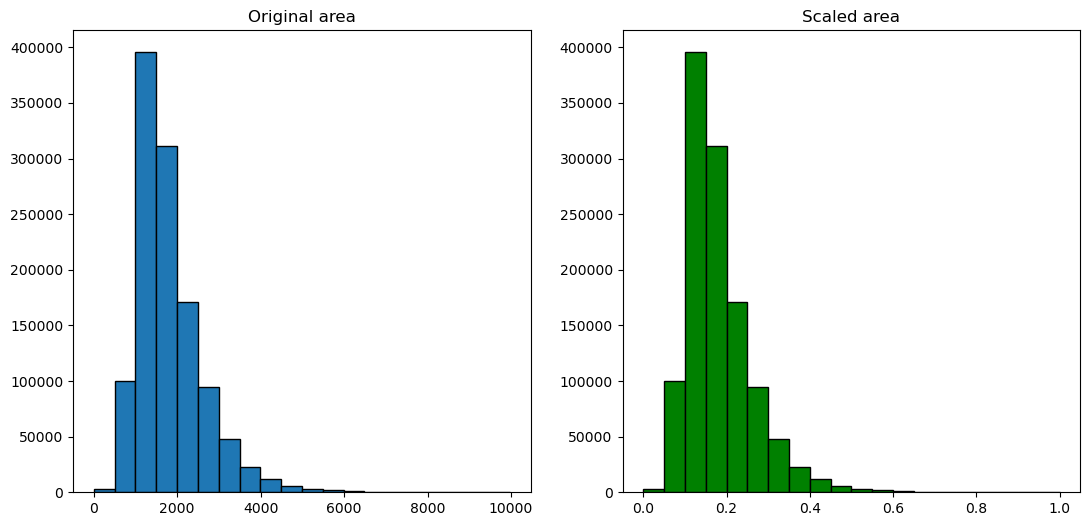

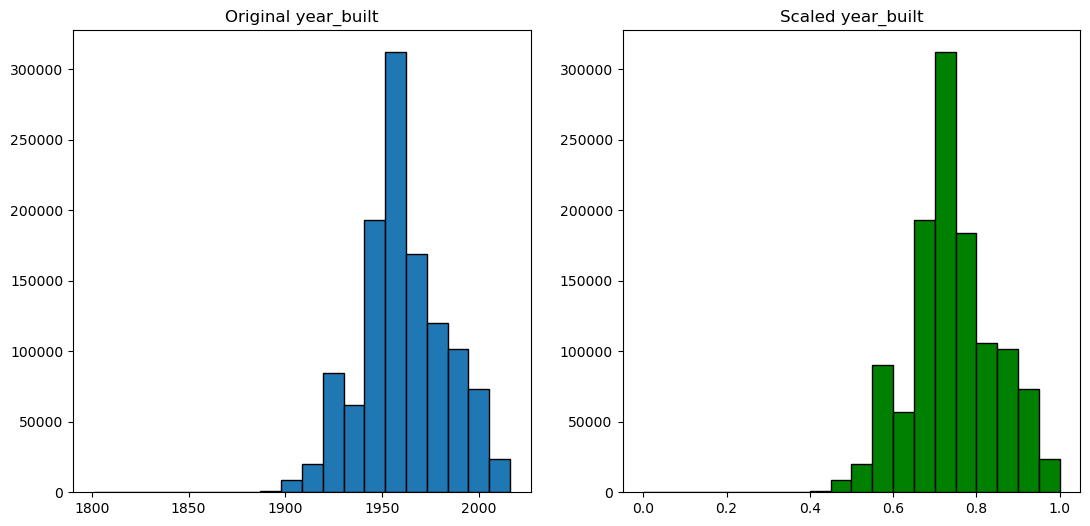

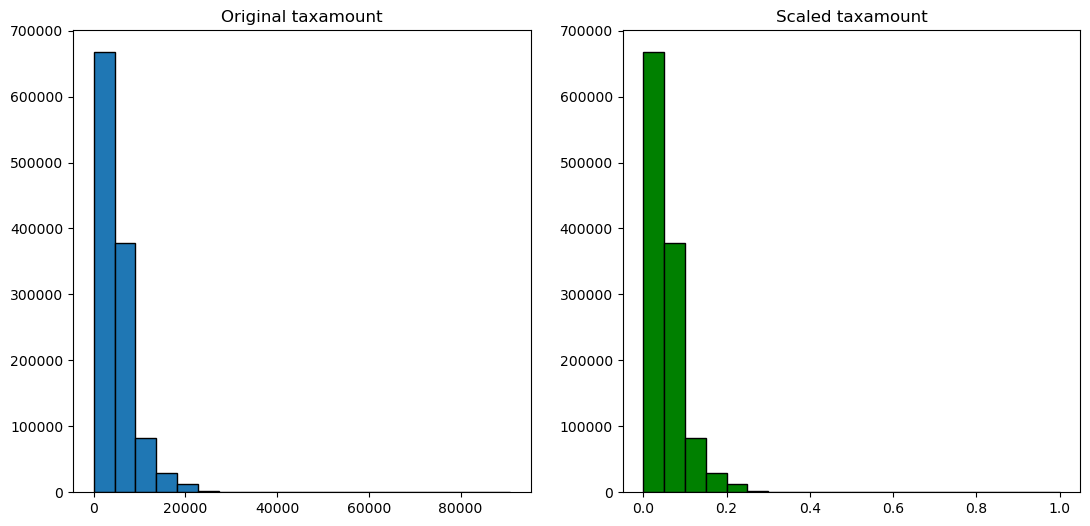

In [11]:
for col in scale_cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data = train, x = col, bins = 20,  ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(data = train_1, x = col, bins = 20, ec='black', color = 'green')
    plt.title(f'Scaled {col}')


Standard Scaler

In [12]:
standard_scaler = p.StandardScaler()
standard_scaler.fit(train_2[scale_cols])
train_2[scale_cols] = standard_scaler.fit_transform(train_2[scale_cols])

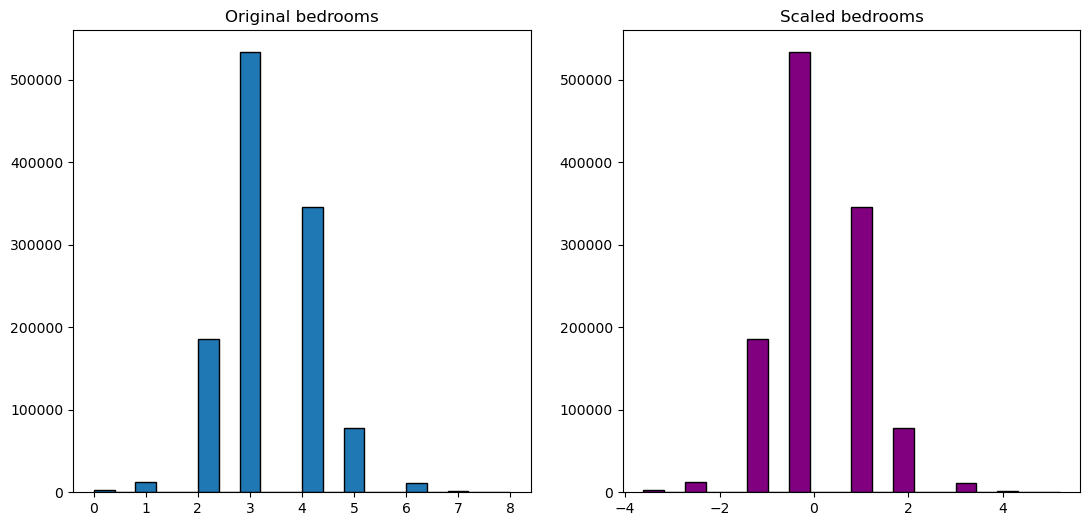

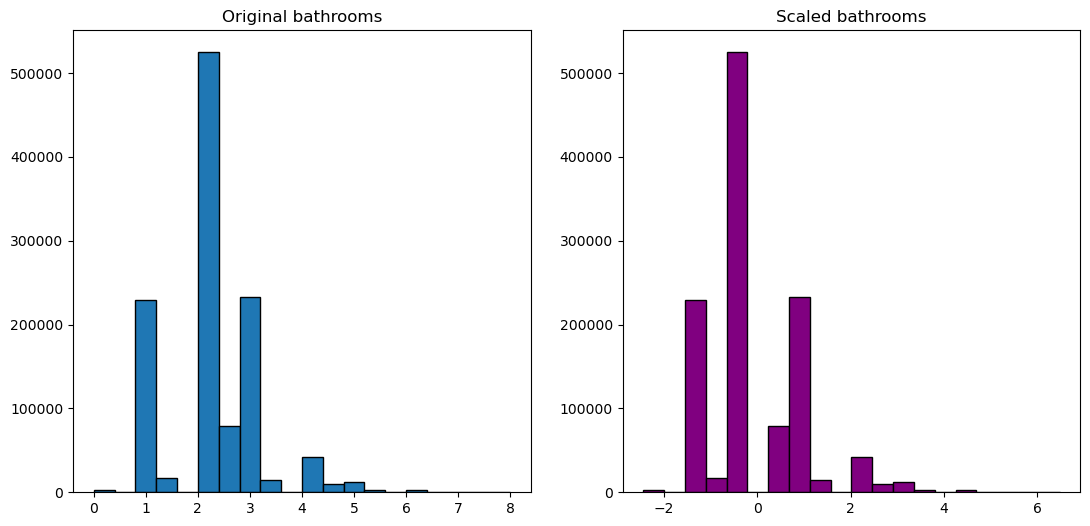

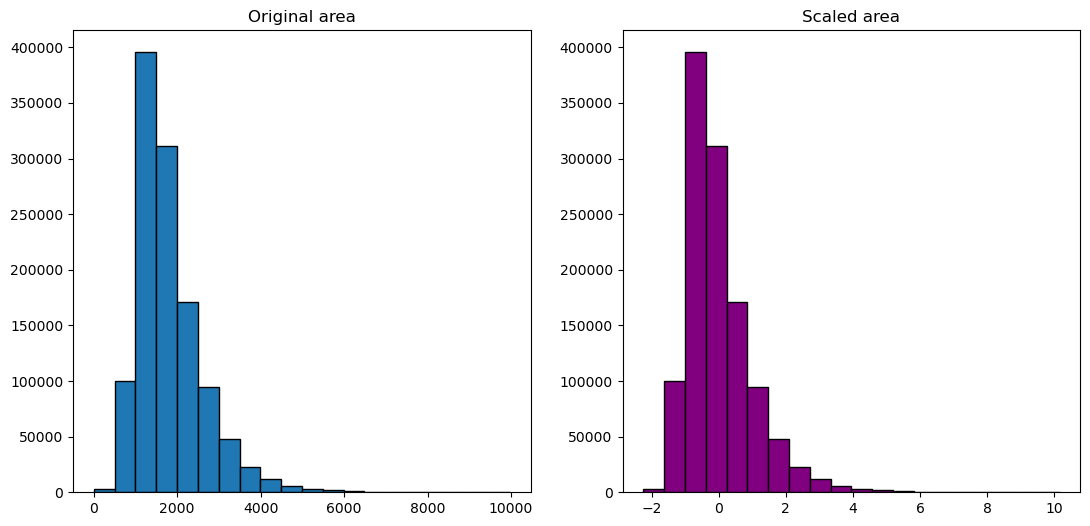

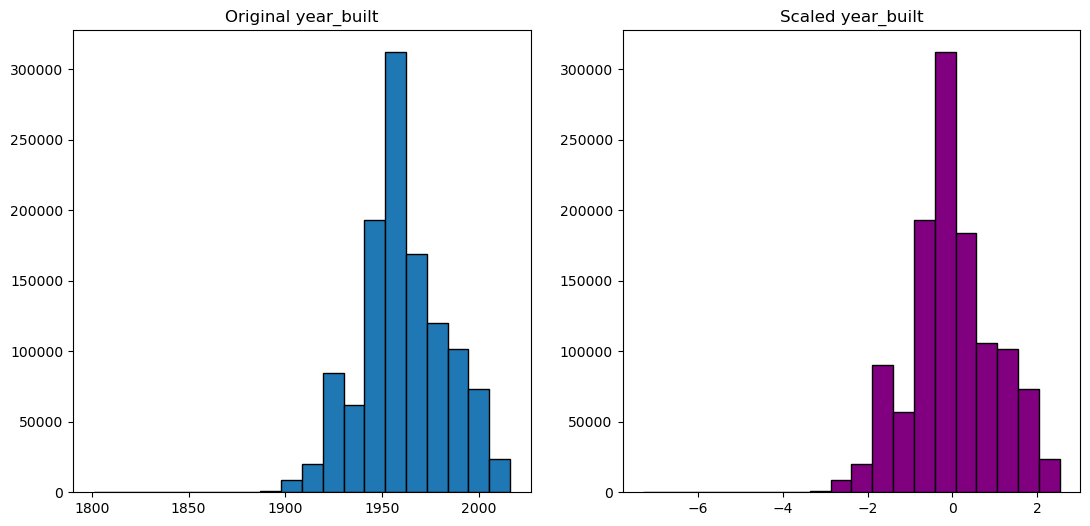

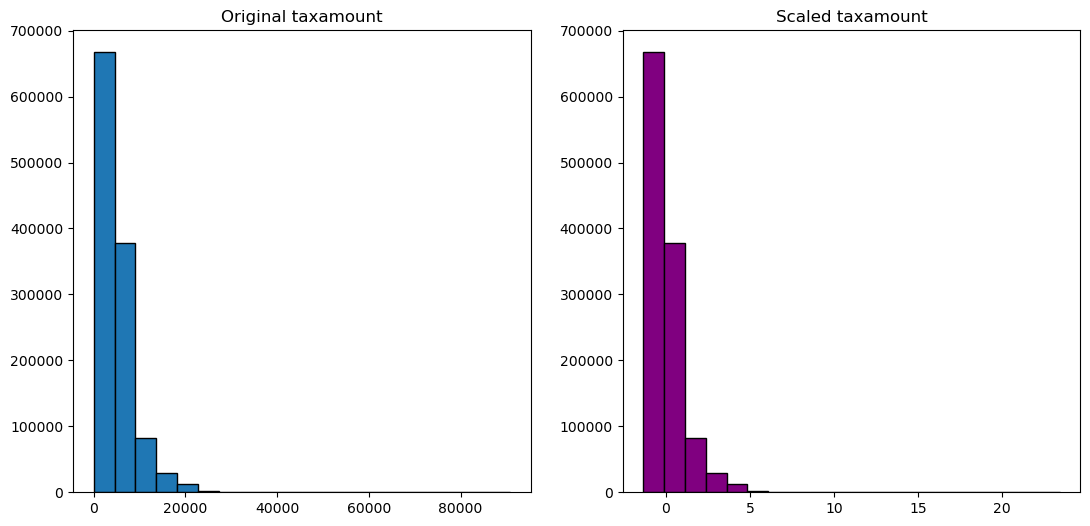

In [13]:
for col in scale_cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data = train, x = col, bins = 20,  ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(data = train_2, x = col, bins = 20, ec='black', color = 'purple')
    plt.title(f'Scaled {col}')

Robust Scaler

In [14]:
robust_scaler = p.RobustScaler()
robust_scaler.fit(train_3[scale_cols])

RobustScaler()

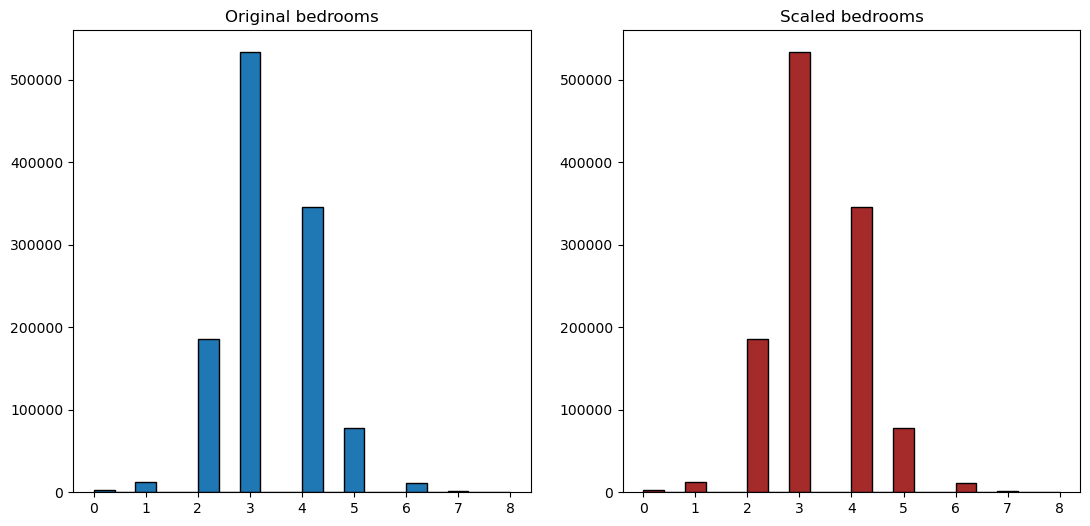

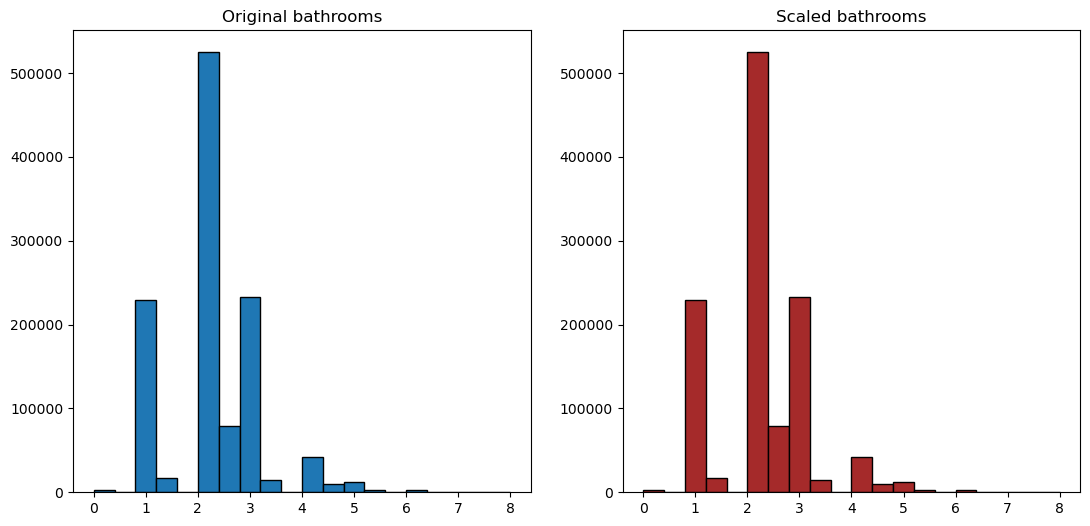

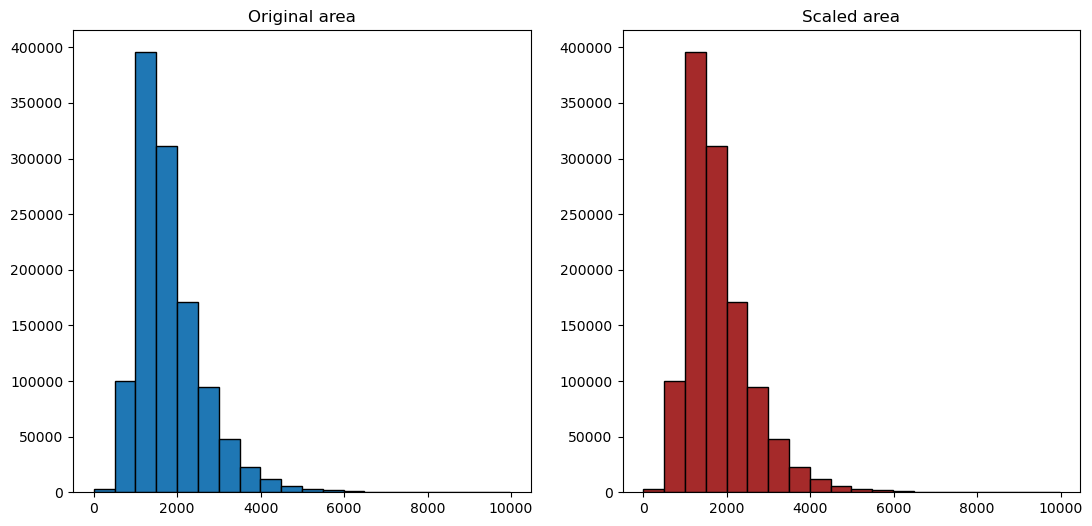

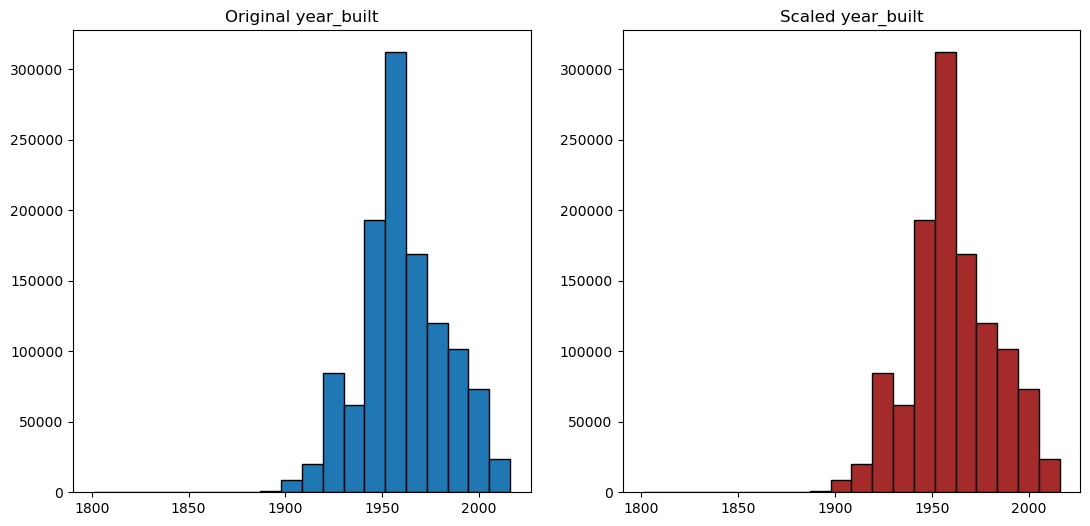

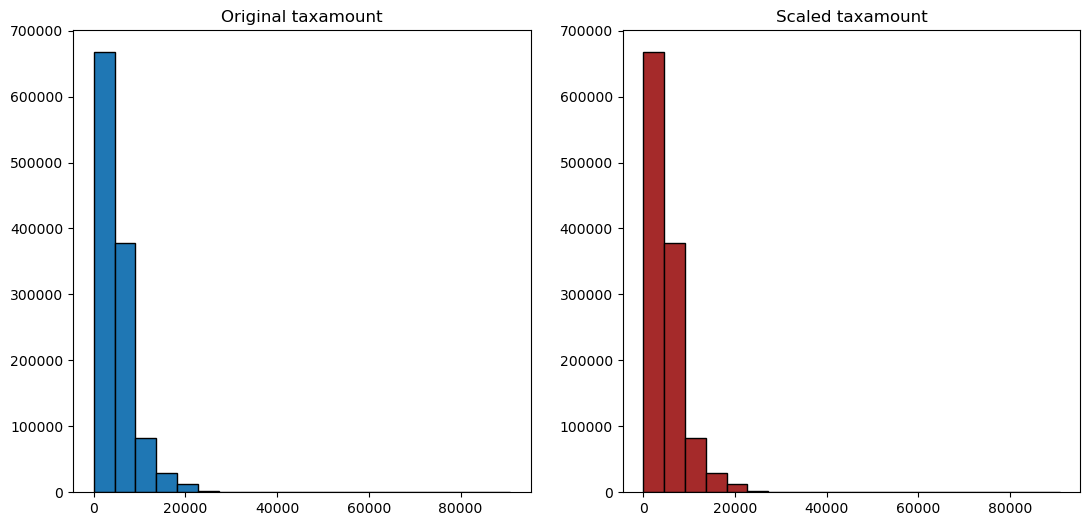

In [15]:
for col in scale_cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data = train, x = col, bins = 20,  ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(data = train_3, x = col, bins = 20, ec='black', color = 'brown')
    plt.title(f'Scaled {col}')

2) Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [16]:
minmax_scaler = p.MinMaxScaler()
OG = train[['area']]
scaled = minmax_scaler.fit_transform(OG)
scaled[0:5]

array([[0.12969831],
       [0.1562594 ],
       [0.24927333],
       [0.23945074],
       [0.10634459]])

In [17]:
inverse = minmax_scaler.inverse_transform(scaled)
inverse[:5], OG[:5]

(array([[1295.],
        [1560.],
        [2488.],
        [2390.],
        [1062.]]),
            area
 1300070  1295.0
 1452400  1560.0
 1765137  2488.0
 1668212  2390.0
 1670142  1062.0)

Yes, applying .inverse_transform reverts the data to its original form.



3) Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. 


In [18]:
#make a 4th copy of train for QuantileTransformer
train_4 = train.copy()

In [19]:
train_4[scale_cols] = p.QuantileTransformer(output_distribution = 'normal').fit_transform(train[scale_cols])
train.head(), train_4.head()

(         bedrooms  bathrooms    area  tax_value  year_built  taxamount  \
 1300070       4.0        2.0  1295.0   356809.0      1954.0    4260.46   
 1452400       3.0        2.0  1560.0   388535.0      1968.0    3935.70   
 1765137       5.0        2.5  2488.0   370328.0      2000.0    4345.96   
 1668212       4.0        2.5  2390.0   473000.0      2003.0    5715.74   
 1670142       2.0        1.0  1062.0   447299.0      1938.0    4906.42   
 
            fips  propertylandusetypeid  
 1300070  6059.0                  261.0  
 1452400  6059.0                  261.0  
 1765137  6111.0                  261.0  
 1668212  6111.0                  261.0  
 1670142  6037.0                  261.0  ,
          bedrooms  bathrooms      area  tax_value  year_built  taxamount  \
 1300070  0.754664  -0.157469 -0.577557   356809.0   -0.296607   0.080684   
 1452400 -0.253606  -0.157469 -0.084155   388535.0    0.450080  -0.035300   
 1765137  1.700222   0.507774  0.967822   370328.0    1.625274  


4) Visualize the result of your data scaling.


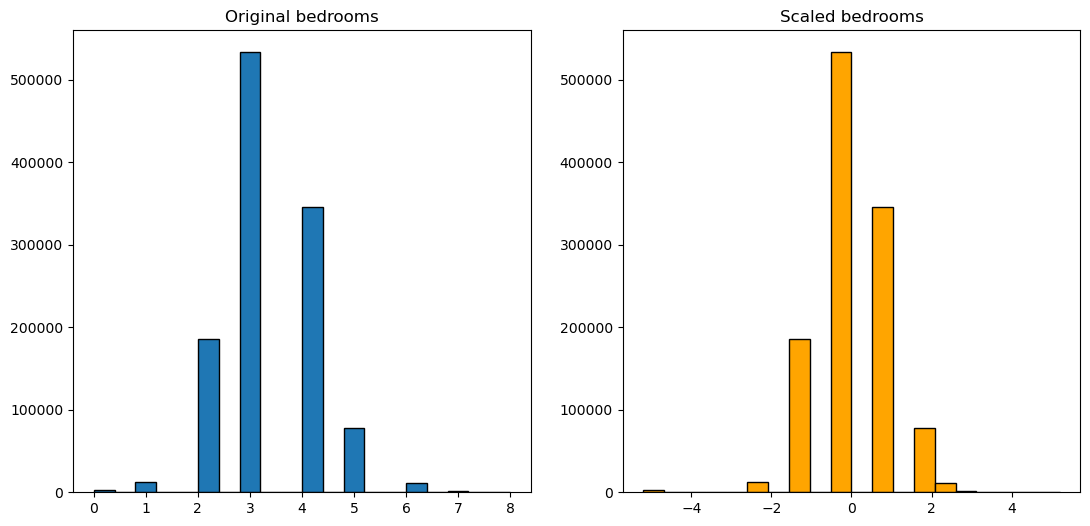

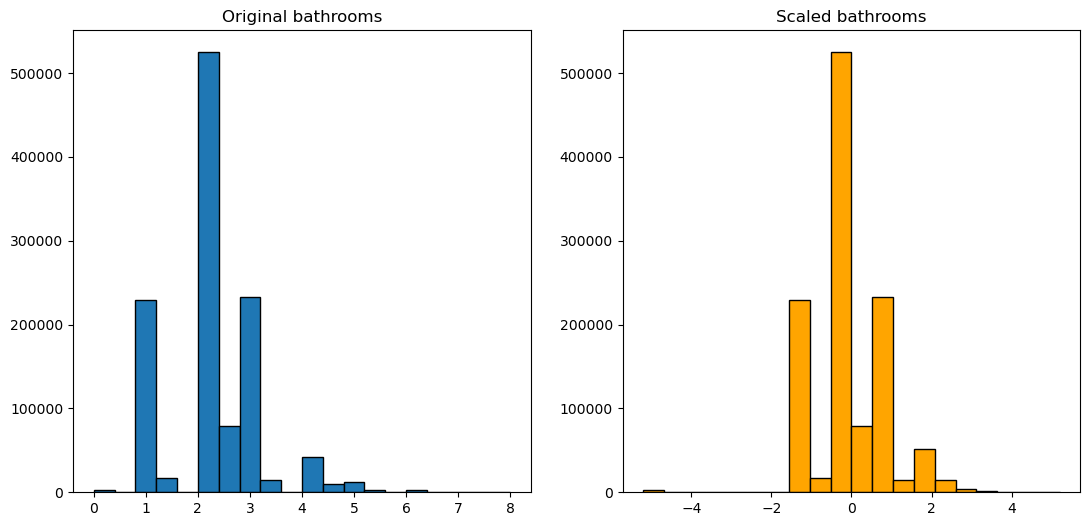

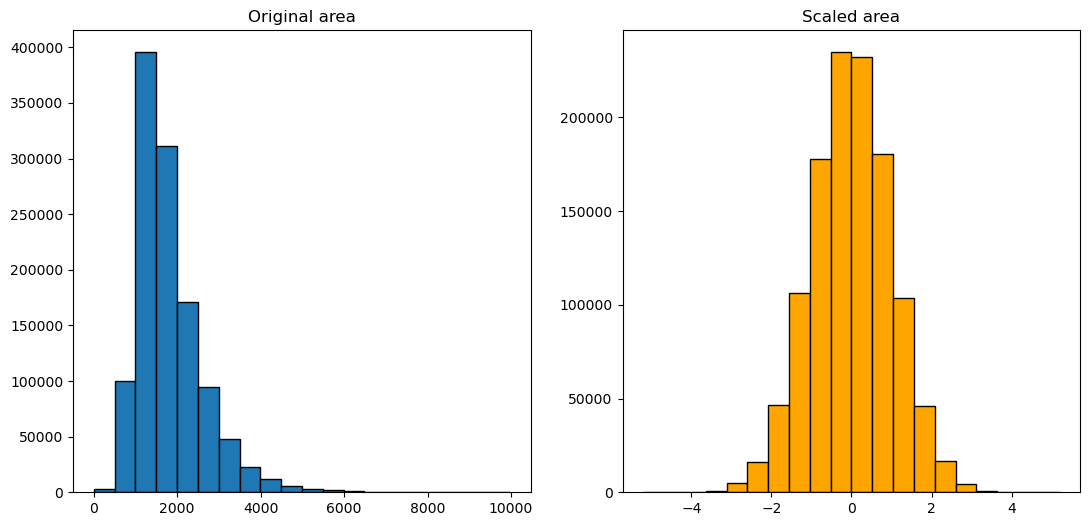

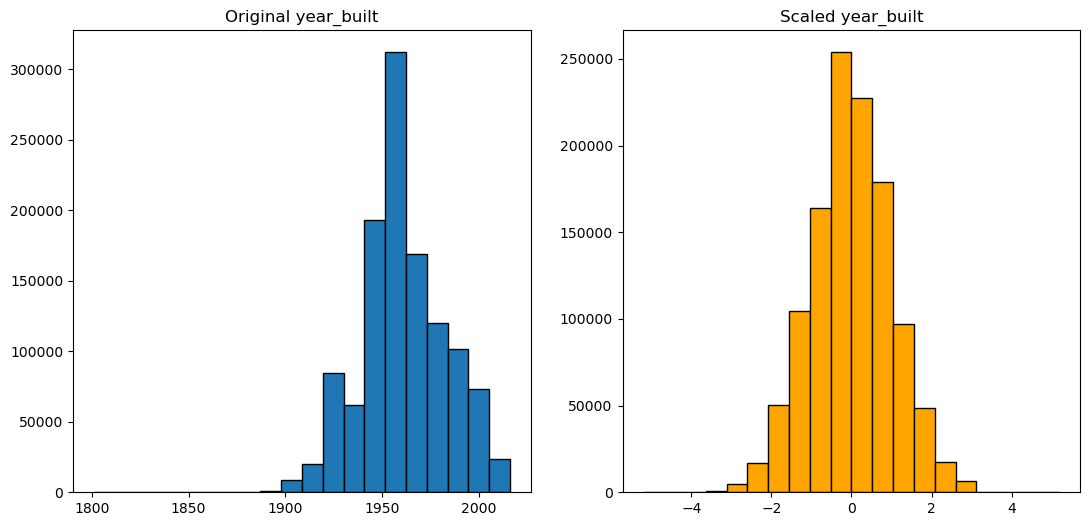

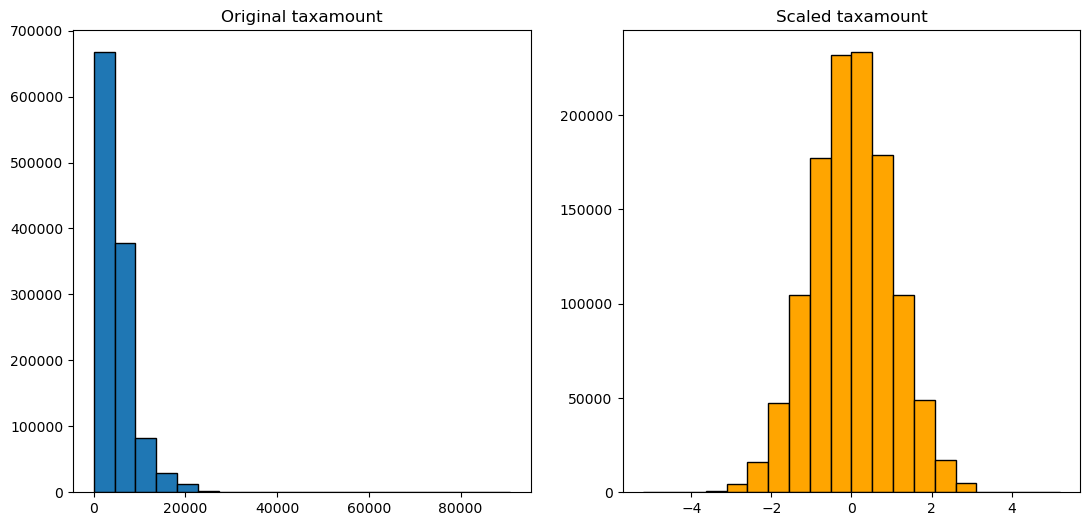

In [20]:
for col in scale_cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data = train, x = col, bins = 20,  ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(data = train_4, x = col, bins = 20, ec='black', color = 'orange')
    plt.title(f'Scaled {col}')

5) Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice? Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!



In [21]:
train_4[scale_cols] = p.QuantileTransformer().fit_transform(train[scale_cols])


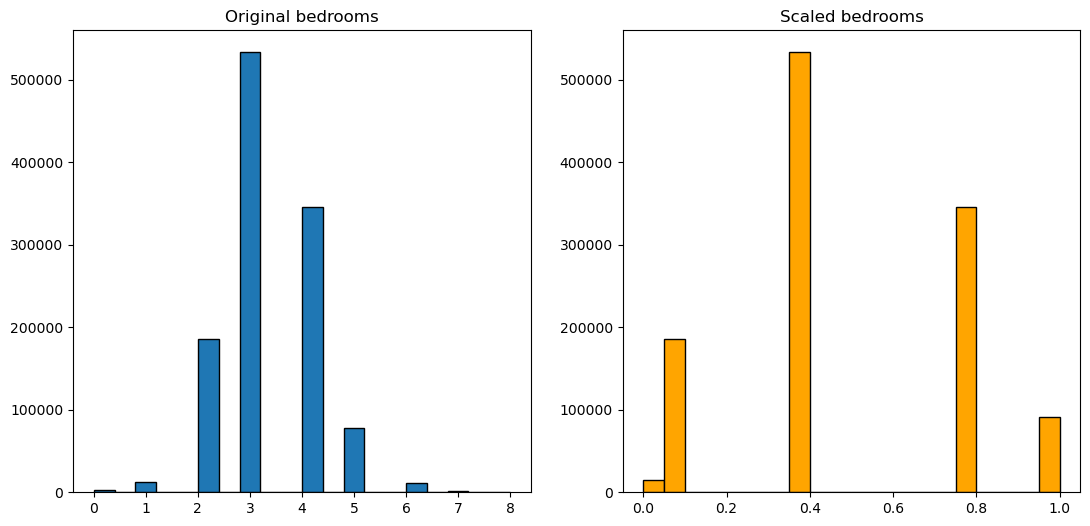

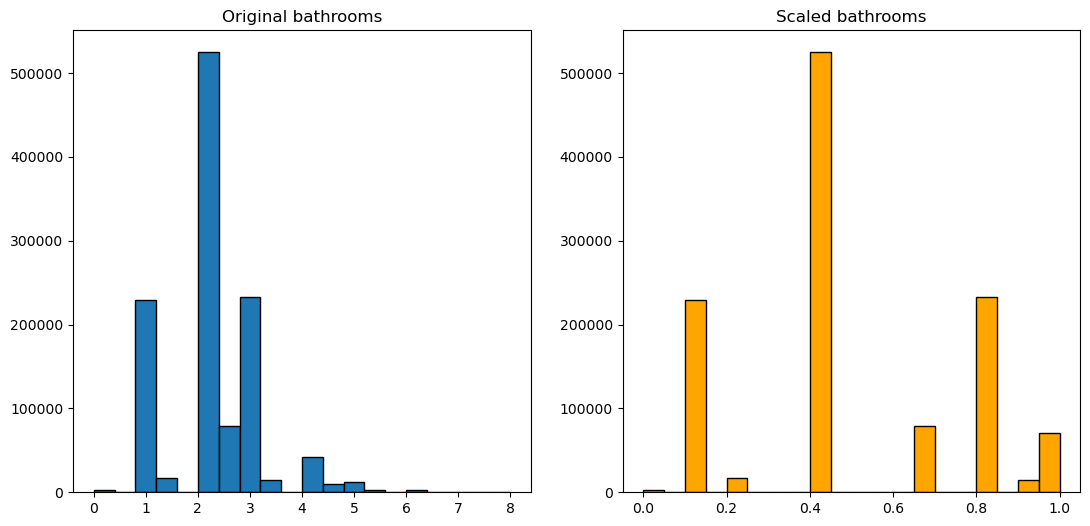

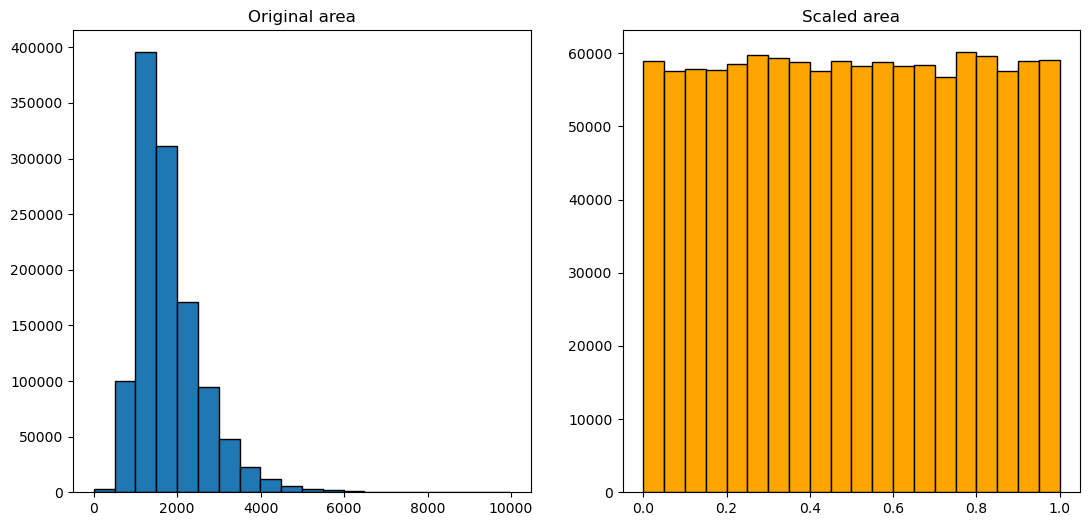

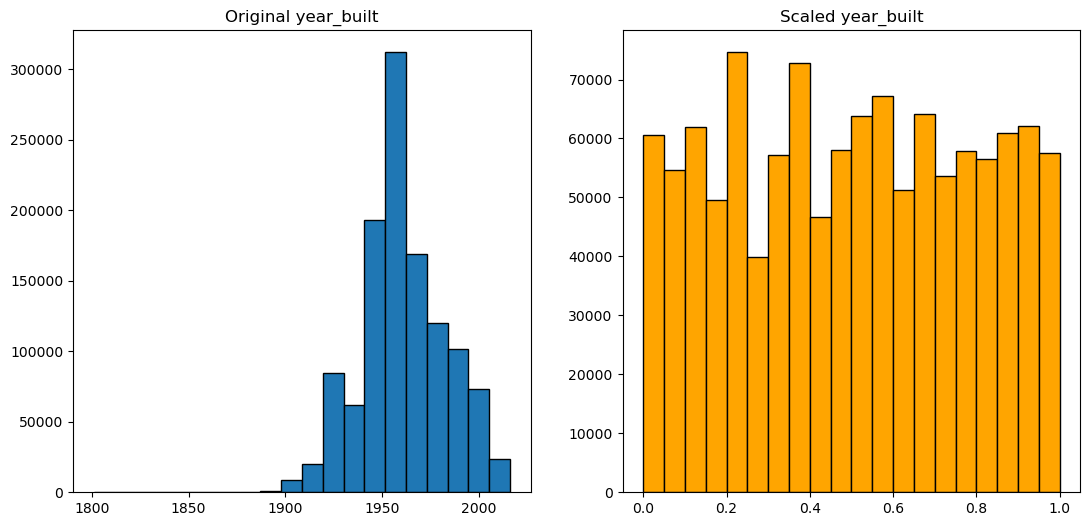

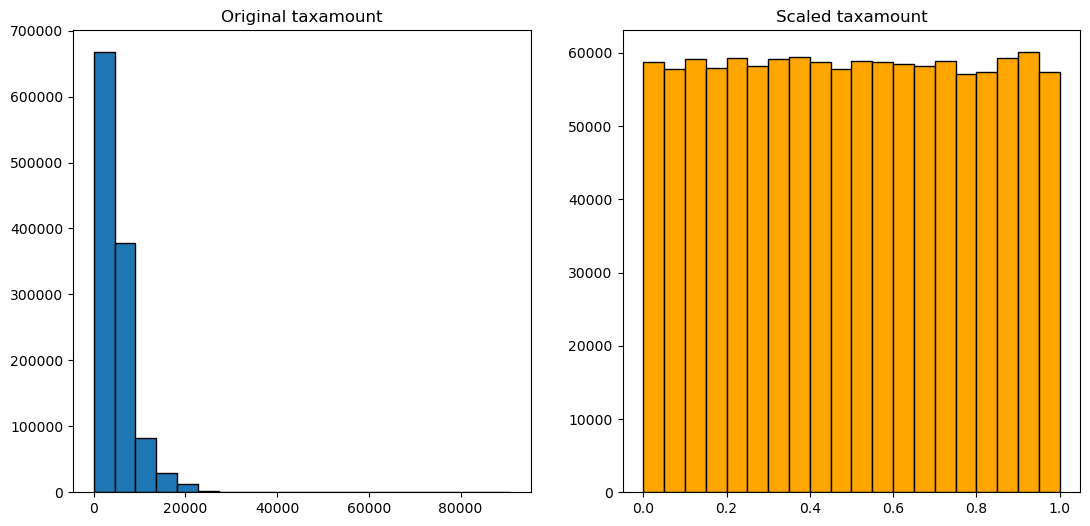

In [22]:
for col in scale_cols:
    plt.figure(figsize=(13, 6))
    plt.subplot(121)
    plt.hist(data = train, x = col, bins = 20,  ec='black')
    plt.title(f'Original {col}')
    plt.subplot(122)
    plt.hist(data = train_4, x = col, bins = 20, ec='black', color = 'orange')
    plt.title(f'Scaled {col}')

choosing to use minmaxscaler

In [23]:
#minmaxscaler

def scale_zillow(train, validate, test):

    train_1 = train.copy()
    validate_1 = validate.copy()
    test_1 = validate.copy()

    scale_cols = ['bedrooms', 'bathrooms', 'area', 'year_built', 'taxamount']
    minmax_scaler = p.MinMaxScaler()
    minmax_scaler.fit(train_1[scale_cols])
    train_1[scale_cols] = minmax_scaler.transform(train[scale_cols])
    validate_1 = minmax_scaler.transform(validate[scale_cols])
    test_1 = minmax_scaler.transform(test[scale_cols])

    return pd.DataFrame(train_1).set_index([train.index.values]), pd.DataFrame(validate_1).set_index([validate.index.values]), pd.DataFrame(test_1).set_index([test.index.values])
